In [1]:
%matplotlib inline


# Illustration of the sample generation in the over-sampling algorithm


This example illustrates how a new sample is generated taking into account the
neighbourhood of this sample. A new sample is generated by selecting the
randomly 2 samples of the same classe and interpolating a point between these
samples.




Automatically created module for IPython interactive environment


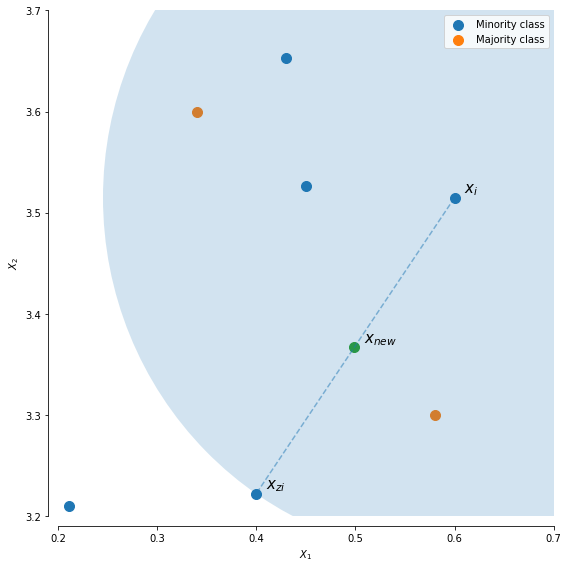

In [2]:
# Authors: Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

import matplotlib.pyplot as plt
import numpy as np

print(__doc__)

rng = np.random.RandomState(18)

f, ax = plt.subplots(1, 1, figsize=(8, 8))

# generate some data points
y = np.array([3.65284, 3.52623, 3.51468, 3.22199, 3.21])
z = np.array([0.43, 0.45, 0.6, 0.4, 0.211])
y_2 = np.array([3.3, 3.6])
z_2 = np.array([0.58, 0.34])

# plot the majority and minority samples
ax.scatter(z, y, label='Minority class', s=100)
ax.scatter(z_2, y_2, label='Majority class', s=100)

idx = rng.randint(len(y), size=2)
annotation = [r'$x_i$', r'$x_{zi}$']

for a, i in zip(annotation, idx):
    ax.annotate(a, (z[i], y[i]),
                xytext=tuple([z[i] + 0.01, y[i] + 0.005]),
                fontsize=15)

# draw the circle in which the new sample will generated
radius = np.sqrt((z[idx[0]] - z[idx[1]]) ** 2 + (y[idx[0]] - y[idx[1]]) ** 2)
circle = plt.Circle((z[idx[0]], y[idx[0]]), radius=radius, alpha=0.2)
ax.add_artist(circle)

# plot the line on which the sample will be generated
ax.plot(z[idx], y[idx], '--', alpha=0.5)

# create and plot the new sample
step = rng.uniform()
y_gen = y[idx[0]] + step * (y[idx[1]] - y[idx[0]])
z_gen = z[idx[0]] + step * (z[idx[1]] - z[idx[0]])

ax.scatter(z_gen, y_gen, s=100)
ax.annotate(r'$x_{new}$', (z_gen, y_gen),
            xytext=tuple([z_gen + 0.01, y_gen + 0.005]),
            fontsize=15)

# make the plot nicer with legend and label
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.set_xlim([0.2, 0.7])
ax.set_ylim([3.2, 3.7])
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.legend()
plt.tight_layout()
plt.show()